In [24]:
%matplotlib inline

import pickle
import os, random
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

dataPath = '../PedestrianData/IntentionData'
pd.__version__

'0.24.2'

In [3]:
data = pd.read_pickle('../PedestrianData/Rafael.pkl')
list(data)
for i in range(len(data)):
    value = data['File'].values[i].split('/')
    data['File'].values[i] = value[len(value) - 1]
    data['Wait Time (s)'] == "Err2"
    
data = data[data['Wait Time (s)'] != "Err1"]
data = data[data['Wait Time (s)'] != "Err2"]
data = data[data['Wait Time (s)'] != "Err3"]
data = data[data['Wait Time (s)'] != "Err4"]
data = data[data['Wait Time (s)'] != "Err5"]
data = data[data['Wait Time (s)'] != 0]
    
data.shape

(3410, 65)

In [12]:
while True:
    file1 = random.choice(os.listdir(dataPath))    
    file2 = random.choice(os.listdir(dataPath))    
    file3 = random.choice(os.listdir(dataPath))    
    if (data.loc[data['File'] == file1]['Wait Time (s)'].empty
        or data.loc[data['File'] == file2]['Wait Time (s)'].empty
       or data.loc[data['File'] == file3]['Wait Time (s)'].empty):
        continue
    else:
        break

crossTime1 = data.loc[data['File'] == file1]['Wait Time (s)']
crossTime2 = data.loc[data['File'] == file2]['Wait Time (s)']
crossTime3 = data.loc[data['File'] == file3]['Wait Time (s)']

width1 = data.loc[data['File'] == file1]['Lane Width']
width2 = data.loc[data['File'] == file2]['Lane Width']
width3 = data.loc[data['File'] == file3]['Lane Width']

if(data.loc[data['File'] == file1]['One way'].item() == 1):
    lane1 = 'One Way'
else:
    lane1 = "Two Way"
    
if(data.loc[data['File'] == file2]['One way'].item() == 1):
    lane2 = 'One Way'
else:
    lane2 = "Two Way"
    
if(data.loc[data['File'] == file2]['One way'].item() == 1):
    lane3 = 'One Way'
else:
    lane3 = "Two Way"

print(dataPath + '/' + file1)
df1 = pd.read_csv(dataPath + '/' + file1, sep=",", header=None, 
                 names=["Time", 
                        "Pos_x", "Pos_y", "Pos_z", 
                        "Gaz_x", "Gaz_y", "Gaz_z", 
                        "Vel_x", "Vel_z",
                        "Acc_x", "Acc_z",
                        "Vel_Mag", "Acc_Mag",
                        "Vel_Ang", "Acc_Ang", "Gaz_Ang",
                        "Vel_Bin", "Acc_Bin", "Gaz_Bin", "Chg_Bin"          
                       ])
df2 = pd.read_csv(dataPath + '/' + file2, sep=",", header=None, 
                 names=["Time", 
                        "Pos_x", "Pos_y", "Pos_z", 
                        "Gaz_x", "Gaz_y", "Gaz_z", 
                        "Vel_x", "Vel_z",
                        "Acc_x", "Acc_z",
                        "Vel_Mag", "Acc_Mag",
                        "Vel_Ang", "Acc_Ang", "Gaz_Ang",
                        "Vel_Bin", "Acc_Bin", "Gaz_Bin", "Chg_Bin"
                       ])
df3 = pd.read_csv(dataPath + '/' + file3, sep=",", header=None, 
                 names=["Time", 
                        "Pos_x", "Pos_y", "Pos_z", 
                        "Gaz_x", "Gaz_y", "Gaz_z", 
                        "Vel_x", "Vel_z",
                        "Acc_x", "Acc_z",
                        "Vel_Mag", "Acc_Mag",
                        "Vel_Ang", "Acc_Ang", "Gaz_Ang",
                        "Vel_Bin", "Acc_Bin", "Gaz_Bin", "Chg_Bin"
                       ])

../PedestrianData/IntentionData/85--2018-15-6--10-42-59.txt


## Visualizing gaze directions over time 

The figure shows a respondent at their starting point (y = ~653) in the virtual environment and walking across the virtual road as y approaches ~649

Arrows show the 2D direction that the respondent was facing at that time.

SOUTH faces the other side of the road in the virtual reality environment.

85--2018-15-6--10-42-59.txt
83--2018-12-6--15-28-53.txt
63--2018-14-5--14-30-09.txt


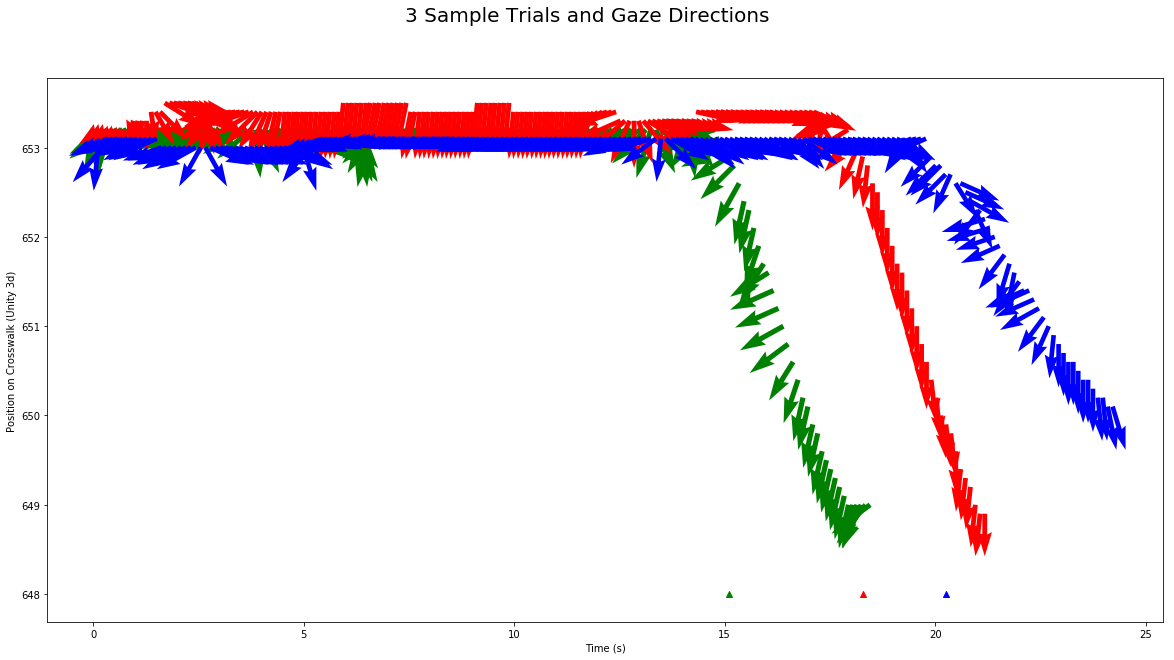

SOUTH faces the other side of the road


In [13]:
data_x = [crossTime1.tolist()[0], crossTime2.tolist()[0], crossTime3.tolist()[0]]
data_y = [648, 648, 648]
#plt.plot(data_x, data_y, 'or')

print(file1)
print(file2)
print(file3)
plt.figure(figsize=(20,10))
plt.quiver(df1["Time"], df1["Pos_z"], df1["Gaz_x"], df1["Gaz_z"], color='g')
plt.quiver(df2["Time"], df2["Pos_z"], df2["Gaz_x"], df2["Gaz_z"], color='r')
plt.quiver(df3["Time"], df3["Pos_z"], df3["Gaz_x"], df3["Gaz_z"], color='b')

plt.scatter(crossTime1, 648, marker='^', color='g')
plt.scatter(crossTime2, 648, marker='^', color='r')
plt.scatter(crossTime3, 648, marker='^', color='b')

plt.xlabel("Time (s)")
plt.ylabel("Position on Crosswalk (Unity 3d)")
plt.suptitle('3 Sample Trials and Gaze Directions', fontsize=20)

plt.show()

print("SOUTH faces the other side of the road")

### Normalized histograms of the discretized directions for head poses and changes
- Includes lane type and width
    - Note difference between One Way and Two Way cases

Green - 2.75 meter lanes - Two Way
Red - 3.0 meter lanes - One Way
Blue - 2.5 meter lanes - One Way


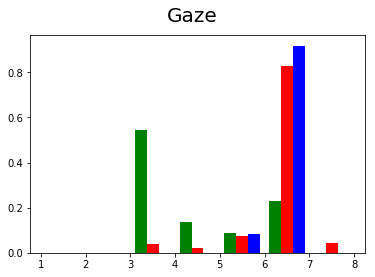

In [5]:
plt.hist([df1["Gaz_Bin"], df2["Gaz_Bin"], df3["Gaz_Bin"]], bins=[1, 2, 3, 4, 5, 6, 7, 8], density=True, color=["green", "red", "blue"])

print("Green - " + str(width1.values[0]) + " meter lanes - " + lane1)
print("Red - " + str(width2.values[0]) + " meter lanes - " + lane2)
print("Blue - " + str(width3.values[0]) + " meter lanes - " + lane3)
plt.suptitle("Gaze", fontsize=20)
plt.show()

Green - 2.75 meter lanes - Two Way
Red - 3.0 meter lanes - One Way
Blue - 2.5 meter lanes - One Way


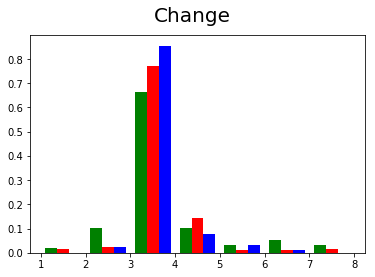

In [6]:
plt.hist([df1["Chg_Bin"], df2["Chg_Bin"], df3["Chg_Bin"]], bins=[1, 2, 3, 4, 5, 6, 7, 8], density=True, color=["green", "red", "blue"])

print("Green - " + str(width1.values[0]) + " meter lanes - " + lane1)
print("Red - " + str(width2.values[0]) + " meter lanes - " + lane2)
print("Blue - " + str(width3.values[0]) + " meter lanes - " + lane3)
plt.suptitle("Change", fontsize=20)
plt.show()

#### Visualizing the path across the road

(286, 293)

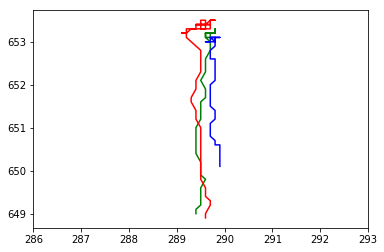

In [59]:
plt.plot(df1["Pos_x"], df1["Pos_z"], color='g')
plt.plot(df2["Pos_x"], df2["Pos_z"], color='r')
plt.plot(df3["Pos_x"], df3["Pos_z"], color='b')

plt.xlim(286, 293)